# About the Data-set

[Food Demand Forecasting (Analytics Vidya)](https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon-1/#About)

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

### Ad-hoc report requirments:

.[1.) What is our demographic spread?](#Q1)

[2.) What are the meal preferrences?](#Q2)

[3.) Major buisness generating cities?](#Q3)

[4.) What is the Year-on-year growth in terms of number of orders?](#Q4)

[5.) What was the overall effect of marketing?](#Q5)


## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (18, 6)
colors_R = sns.color_palette('Reds')
colors_B = sns.color_palette('pastel')
palette = ["#0EB8F1", "#F1480F"]
palette_r = 'Reds'
palette_b = 'Blues'
palette_light = 'pastel'
palette_dark = 'seismic'

pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

In [3]:
center_df = pd.read_csv('fulfilment_center_info.csv')
meal_df = pd.read_csv('meal_info.csv')
train_df = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test_QoiMO9B.csv')

### Understanding the dataset

In [5]:
# meal data-set

meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
meal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [7]:
meal_df.describe()

,meal_id
count,51.000000
mean,2013.921569
std,553.633555
min,1062.000000
25%,1550.500000
50%,1971.000000
75%,2516.500000
max,2956.000000


In [8]:
# train data-set

train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [9]:
train_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [11]:
# Center data-set

center_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [13]:
center_df.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


##### Checking for duplicate data cells.

In [14]:
meal_df.duplicated().sum()

0

In [15]:
train_df.duplicated().sum()

0

In [16]:
center_df.duplicated().sum()

0

##### Checking for null data cells.

In [17]:
meal_df.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [18]:
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [19]:
center_df.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

### Merging datasets

In [20]:
# merge train_df and center_df

df0 = pd.merge(train_df, center_df, how='inner', on='center_id')
df0.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [21]:
df0.shape

(456548, 13)

In [22]:
# merge df1 and meal_df

df = pd.merge(df0,meal_df,how='inner',on='meal_id')
df.sample(6)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
383416,1422836,40,76,2760,173.63,243.53,0,0,203,614,85,TYPE_A,3.0,Other Snacks,Thai
37030,1088306,110,14,2139,307.49,307.49,0,0,26,654,56,TYPE_C,2.7,Beverages,Indian
325086,1345213,123,53,2304,468.51,470.51,0,0,42,590,56,TYPE_A,3.8,Desert,Indian
235747,1264197,14,124,1803,135.83,203.73,0,0,258,590,56,TYPE_C,4.0,Extras,Thai
44106,1362316,88,108,2631,98.00,153.26,0,0,163,579,56,TYPE_B,4.4,Beverages,Indian
54679,1276717,33,94,1248,150.38,245.47,1,0,54,632,34,TYPE_C,3.6,Beverages,Indian


In [23]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [24]:
# df.shape
# (456548, 15)

### Test data

In [25]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [26]:
# Merging test-data with center-data
test_df = pd.merge(test, center_df, how='inner', on='center_id')

# Merging test-data with meal-data
test_df = pd.merge(test_df, meal_df, how='inner', on='meal_id')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   region_code            32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [27]:
test_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

### EDA

In [28]:
def feature_dist_class(df, col):
    
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    
    sns.histplot(x = col, data = df, ax = axes[0],palette = palette_b, edgecolor='black', linewidth=0.5)
    sns.kdeplot(x = col, data = df, fill = True, ax = axes[1], palette = palette_b, linewidth = 2)
    sns.boxplot(y = col, data = df, x = [''] * len(df), ax = axes[2], 
                palette = palette_b, linewidth = 2, flierprops = dict(marker = 'x', markersize = 3.5))
    
    fig.suptitle('For Feature:  ' + col)
    axes[0].set_title('Histogram For Feature ' + col)
    axes[1].set_title('KDE Plot For Feature ' + col)   
    axes[2].set_title('Boxplot For Feature ' + col)      
    
    for ax in axes:
        ax.set_facecolor('#e1ecfa')
        ax.grid(linewidth = 0.25)

In [29]:
cont_names = ['checkout_price', 'base_price', 'num_orders']
obj_names = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured',
             'city_code','region_code', 'center_type', 'op_area', 'category', 'cuisine']

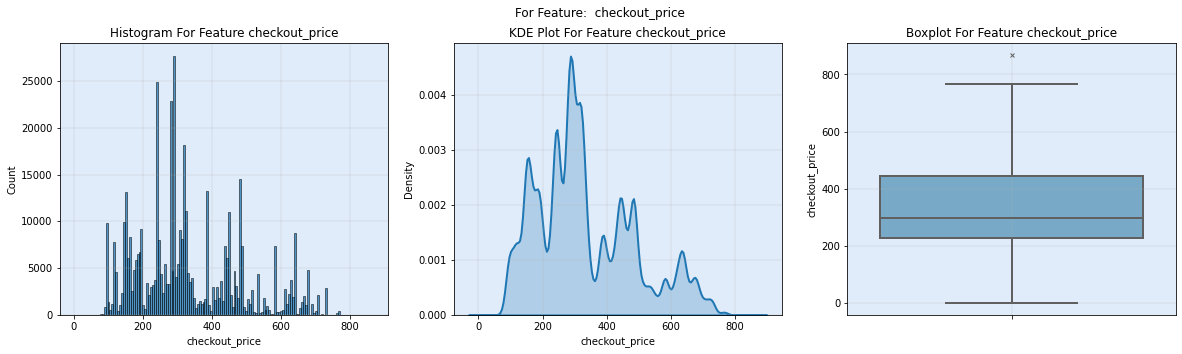

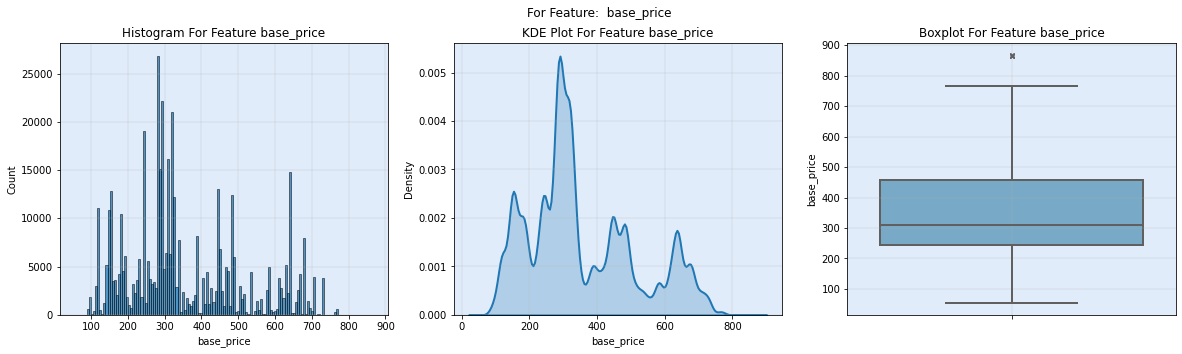

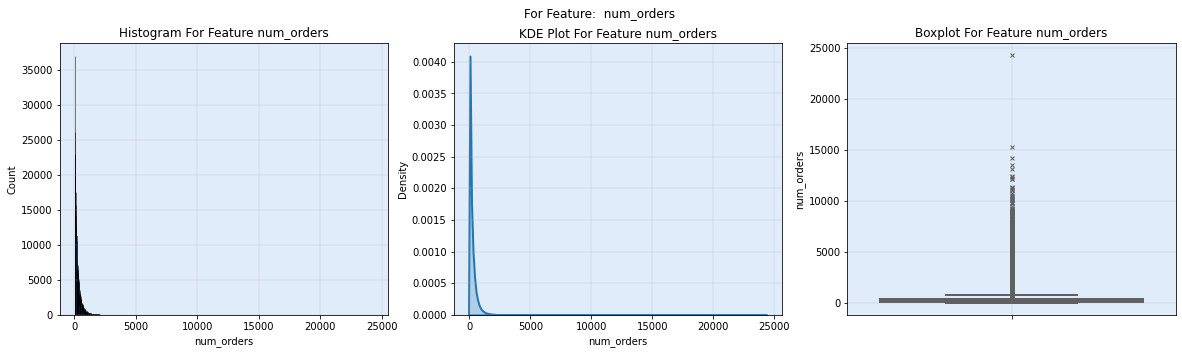

In [30]:
for col in cont_names:
    feature_dist_class(df, col)

##### num_orders data is right skewed, need to perform log transformations before using statistics based algorithms.

In [31]:
def count_percentage(df, col):
    
    plt.figure(figsize = (20, 5))
    ax = plt.gca()
    ax.set_facecolor('#fbfcf7')
    plt.grid(linewidth = 0.25)
    
    sns.countplot(x = col, data = df, palette = palette_r, edgecolor="black", linewidth=0.5)
    plt.xticks(rotation = 90)

### Demographic spread

<a id='Q1'></a>

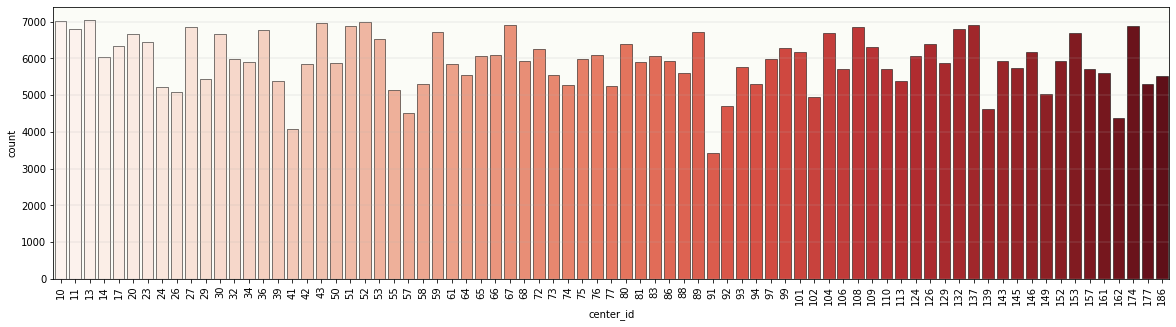

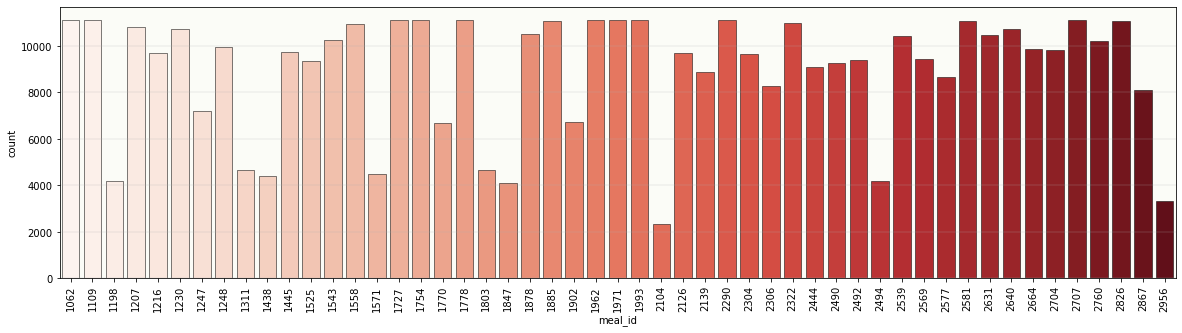

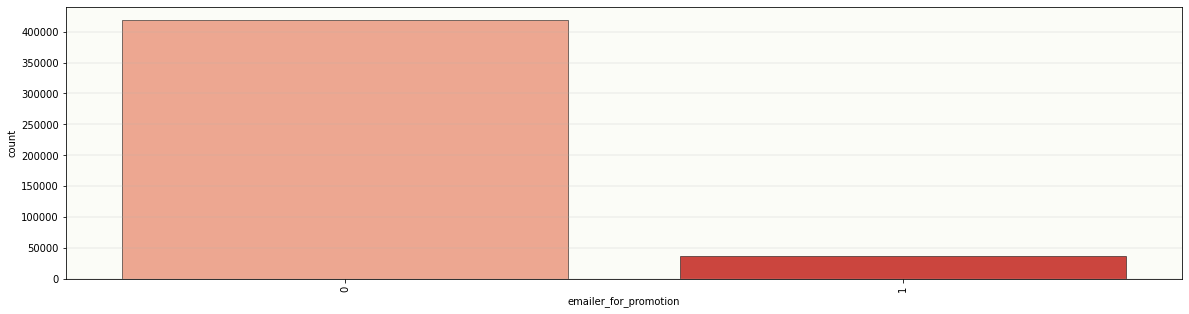

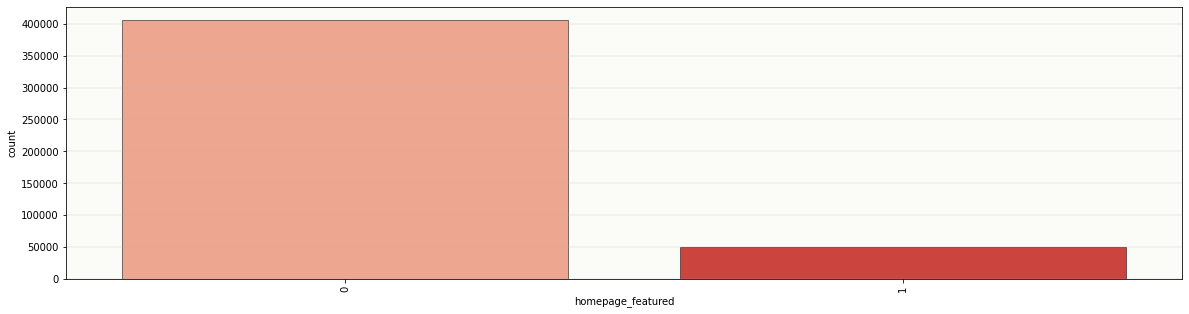

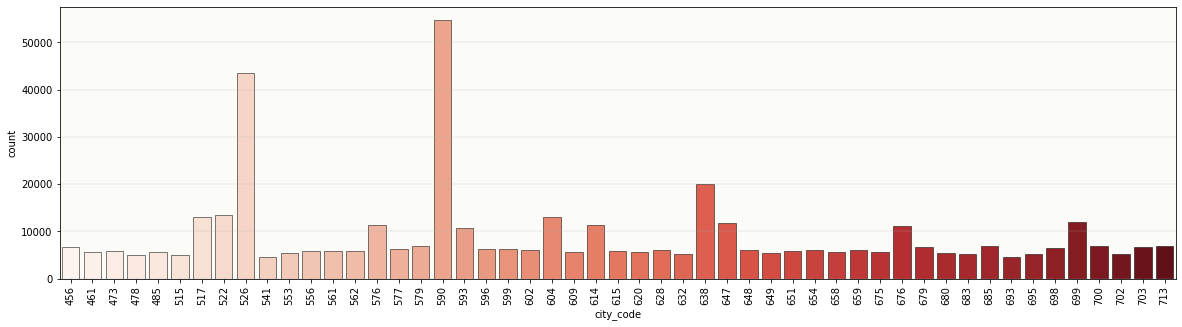

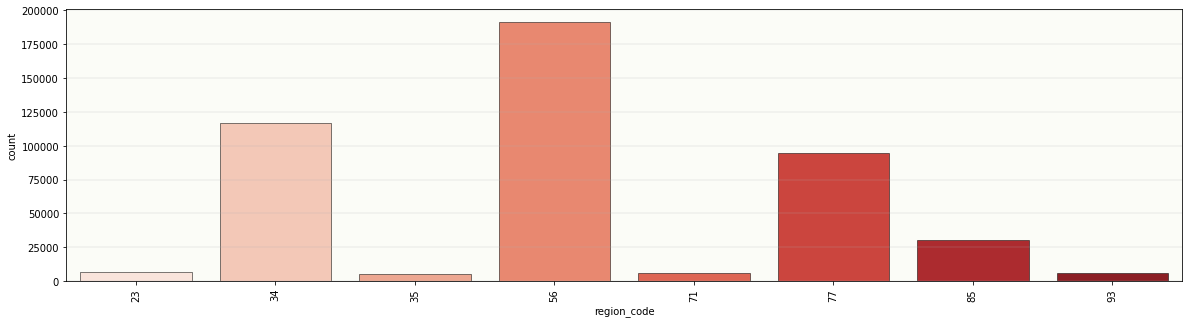

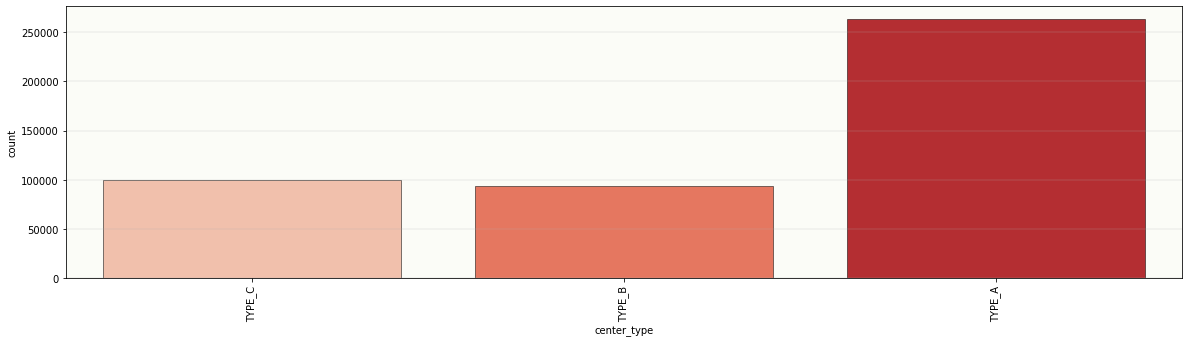

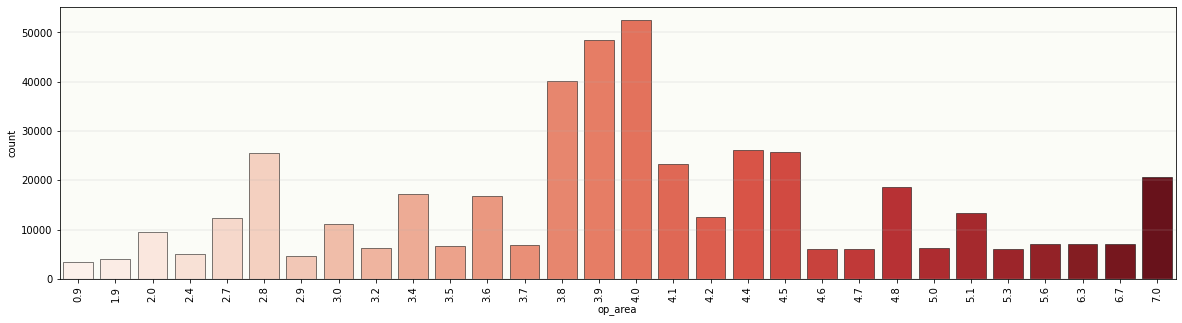

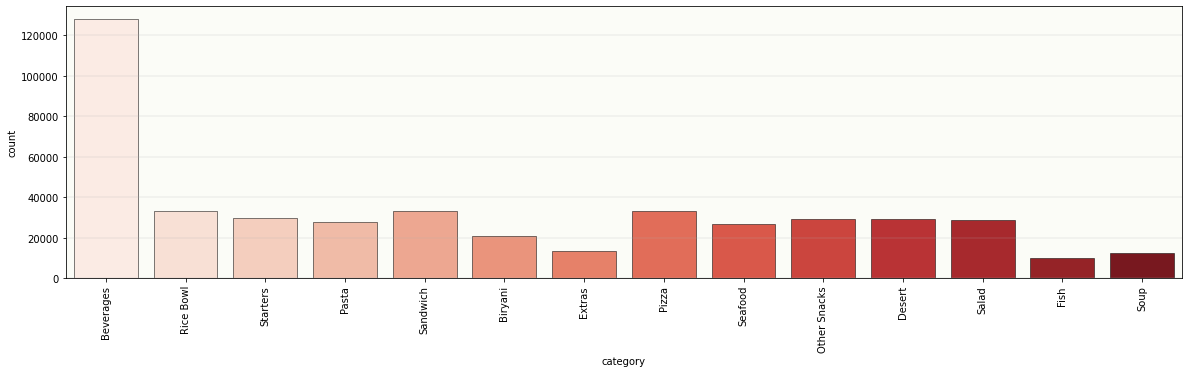

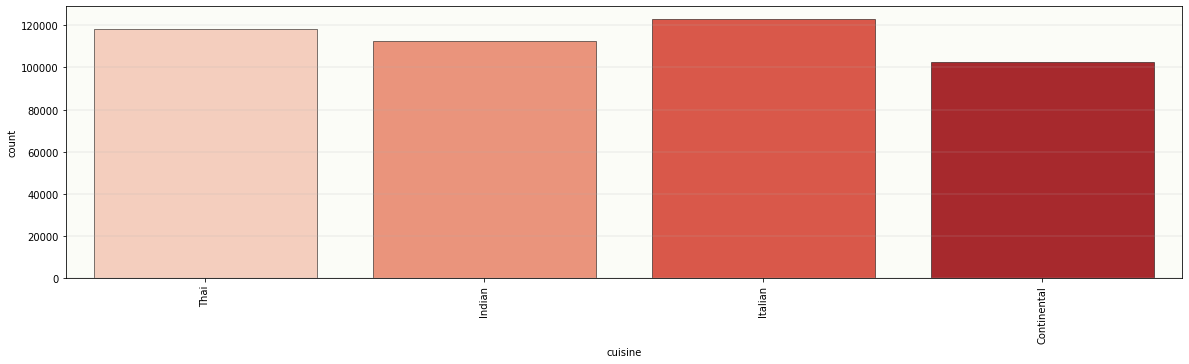

In [32]:
for col in obj_names:
    count_percentage(df, col)

In [33]:
##### Most optimal area for stores seem to be of around 3.8 - 4.1

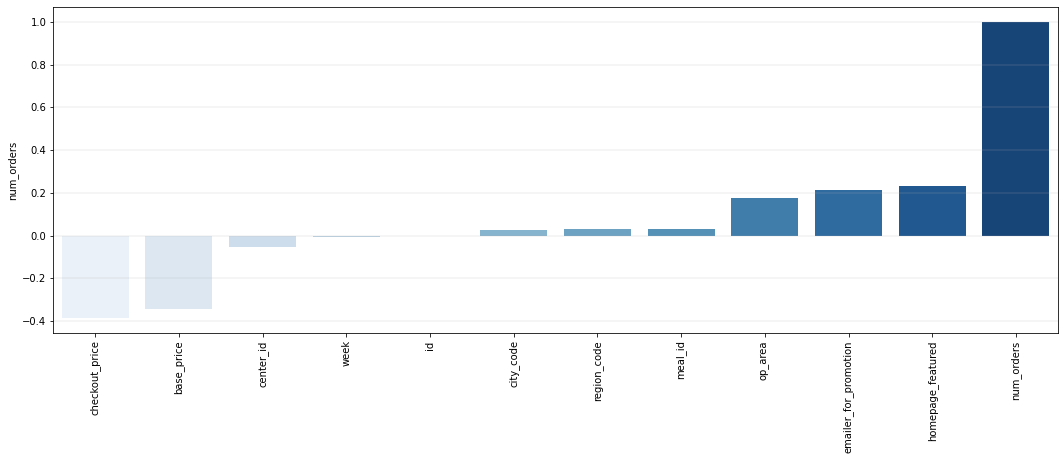

In [34]:
corr_df = df[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
           'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
           'region_code', 'op_area']]

sns.barplot(y = corr_df.corr(method= 'spearman')['num_orders'].sort_values(),
            x= corr_df.corr(method= 'spearman')['num_orders'].sort_values().index,
            palette = palette_b)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);

### Feature engineering

In [35]:
# Creating discount column that will show collective effect of base_price and checkout_price column.

df['total_discount'] = ((df['base_price']-df['checkout_price'])/df['base_price'])*100

In [36]:
df['num_orders'].idxmax()

137437

In [37]:
print(df.iloc[137437])

id                         1452474
week                             5
center_id                       43
meal_id                       2290
checkout_price              159.08
base_price                  311.43
emailer_for_promotion            1
homepage_featured                1
num_orders                   24299
city_code                      590
region_code                     56
center_type                 TYPE_A
op_area                        5.1
category                 Rice Bowl
cuisine                     Indian
total_discount             48.9195
Name: 137437, dtype: object


In [38]:
# Seasonal (according to quarters) cuisines and categorical meals

def quarters(week):
    if (week < 13) or (week > 48 and week < 61) or (week > 96 and week < 109):
        return "Q1"
    elif (week > 12 and week < 25) or (week > 60 and week < 73) or (week > 108 and week < 121):
        return "Q2"
    elif (week > 24 and week < 37) or (week > 72 and week < 85) or (week > 120 and week < 133):
        return "Q3" 
    else:
        return "Q4"

df['quarter'] = np.vectorize(quarters)(df['week'])

In [39]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_discount,quarter
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,Q1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,10.808326,Q1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,0.746714,Q1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-0.741510,Q1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,0.677966,Q1


In [40]:
# Some centers and food id are featured in home page these is can be highly ordered because of advertisement

homepage_feat = df.groupby(['center_id','meal_id'])['homepage_featured'].mean().reset_index()
homepage_feat.rename(columns={'homepage_featured':'avg_homepage_featured'}, inplace = True)
df = pd.merge(df,homepage_feat, on=['center_id','meal_id'], how='left')

In [41]:
homepage_feat

,center_id,meal_id,avg_homepage_featured
0,10,1062,0.055172
1,10,1109,0.110345
2,10,1198,0.082759
3,10,1207,0.159722
4,10,1216,0.069930
...,...,...,...
3592,186,2707,0.020690
3593,186,2760,0.127660
3594,186,2826,0.062937
3595,186,2867,0.121212


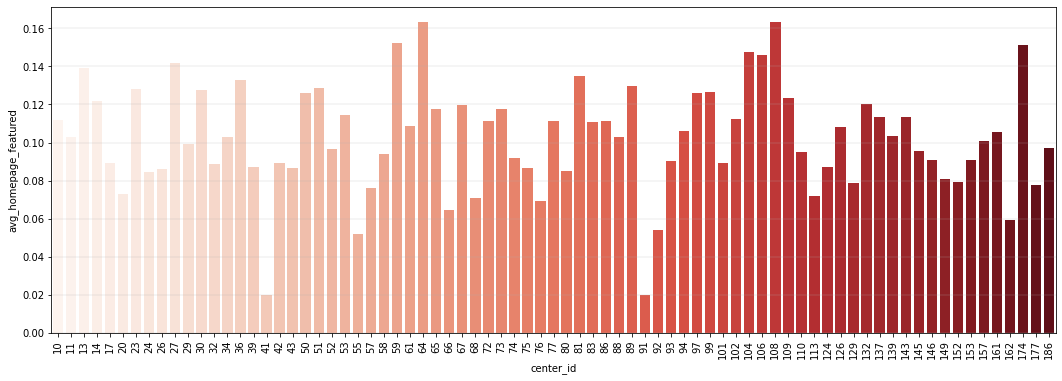

In [42]:
sns.barplot(y='avg_homepage_featured', x='center_id',
            data=homepage_feat.groupby('center_id').avg_homepage_featured.mean().reset_index(),
            palette=palette_r)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);

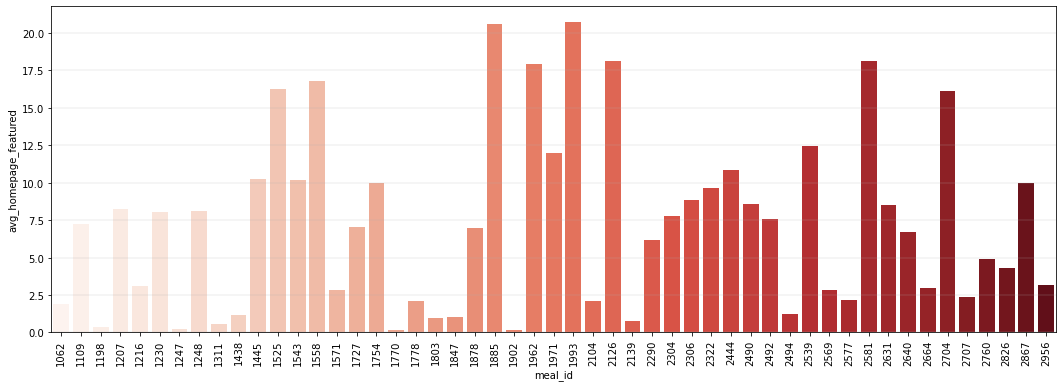

In [43]:
sns.barplot(y='avg_homepage_featured', x='meal_id',
            data=homepage_feat.groupby('meal_id').avg_homepage_featured.sum().reset_index(),
            palette=palette_r)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);

In [44]:
homepage_feat.groupby('meal_id').avg_homepage_featured.sum().sort_values(ascending=False).reset_index()[:10].meal_id
high_promo = df[df['meal_id'].isin([1993,1885,1558,2581,1962,1971,2126])]

In [45]:
print(high_promo['total_discount'].mean())
print(high_promo['num_orders'].sum()/df['num_orders'].sum())

6.420596130091773
0.24016080632676406


6.420596130091773
0.24016080632676406


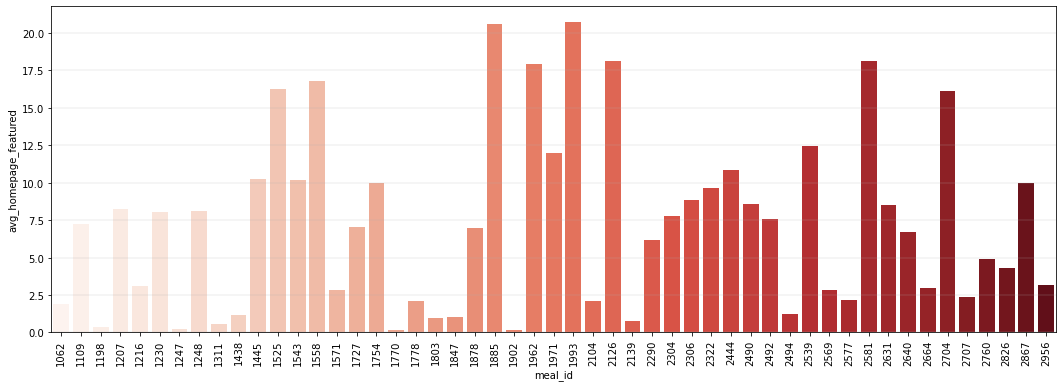

In [46]:
# Some centers and food id are featured in home page these is can be highly ordered because of advertisement

homepage_feat = df.groupby(['center_id','meal_id'])['homepage_featured'].mean().reset_index()
homepage_feat.rename(columns={'homepage_featured':'avg_homepage_featured'}, inplace = True)
df = pd.merge(df,homepage_feat, on=['center_id','meal_id'], how='left')


homepage_feat


sns.barplot(y='avg_homepage_featured', x='center_id',
            data=homepage_feat.groupby('center_id').avg_homepage_featured.mean().reset_index(),
            palette=palette_r)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);



sns.barplot(y='avg_homepage_featured', x='meal_id',
            data=homepage_feat.groupby('meal_id').avg_homepage_featured.sum().reset_index(),
            palette=palette_r)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);



homepage_feat.groupby('meal_id').avg_homepage_featured.sum().sort_values(ascending=False).reset_index()[:10].meal_id
high_promo = df[df['meal_id'].isin([1993,1885,1558,2581,1962,1971,2126])]



print(high_promo['total_discount'].mean())
print(high_promo['num_orders'].sum()/df['num_orders'].sum())




In [47]:
no_promo = df[df['meal_id'].isin([1198,1247,1770,1920,2139])]
print(no_promo['total_discount'].mean())
print((no_promo['num_orders'].sum()/df['num_orders'].sum())*100)

4.418067948172936
1.5238552400127856


In [48]:
# Some centers and food id are promoted by email these can be highly ordered because of that.

email_promo = df.groupby(['center_id','meal_id'])['emailer_for_promotion'].mean().reset_index()
email_promo.rename(columns={'emailer_for_promotion':'avg_email_promo'}, inplace = True)
df = pd.merge(df,email_promo, on=['center_id','meal_id'], how='left')

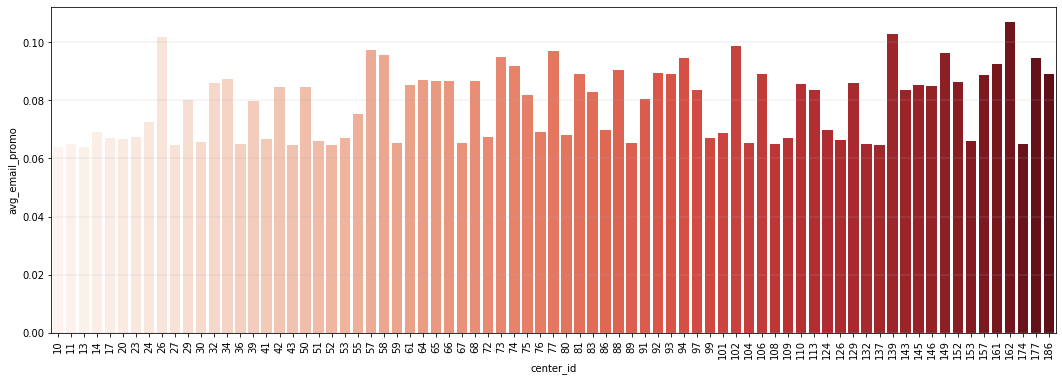

In [49]:
sns.barplot(y='avg_email_promo', x='center_id',
            data=email_promo.groupby('center_id').avg_email_promo.mean().reset_index(),
            palette=palette_r)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);

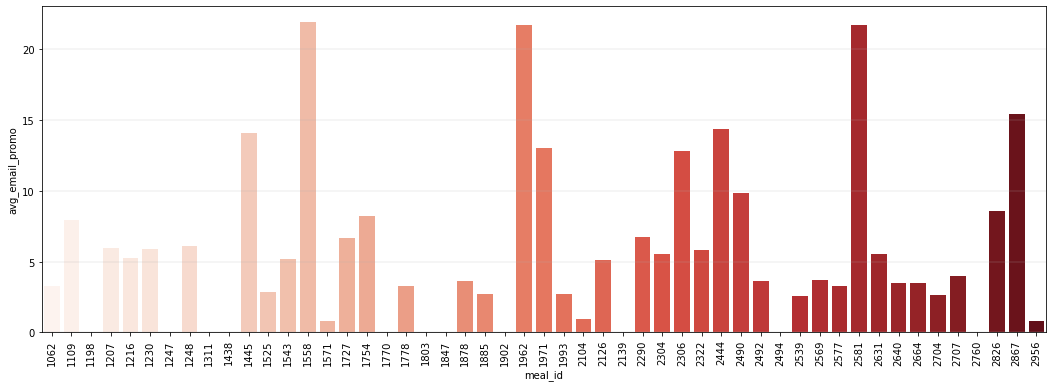

In [50]:
sns.barplot(y='avg_email_promo', x='meal_id',
            data=email_promo.groupby('meal_id').avg_email_promo.sum().reset_index(),
            palette=palette_r)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);

In [51]:
email_promo.groupby('meal_id').avg_email_promo.sum().sort_values(ascending=False).reset_index()[:10].meal_id

0    1558
1    2581
2    1962
3    2867
4    2444
5    1445
6    1971
7    2306
8    2490
9    2826
Name: meal_id, dtype: int64

In [52]:
no_promo = df[df['meal_id'].isin([1198,1247,1770,1920,2139])]
print(no_promo['total_discount'].mean())
print((no_promo['num_orders'].sum()/df['num_orders'].sum())*100)

4.418067948172936
1.5238552400127856


<AxesSubplot:xlabel='cuisine', ylabel='count'>

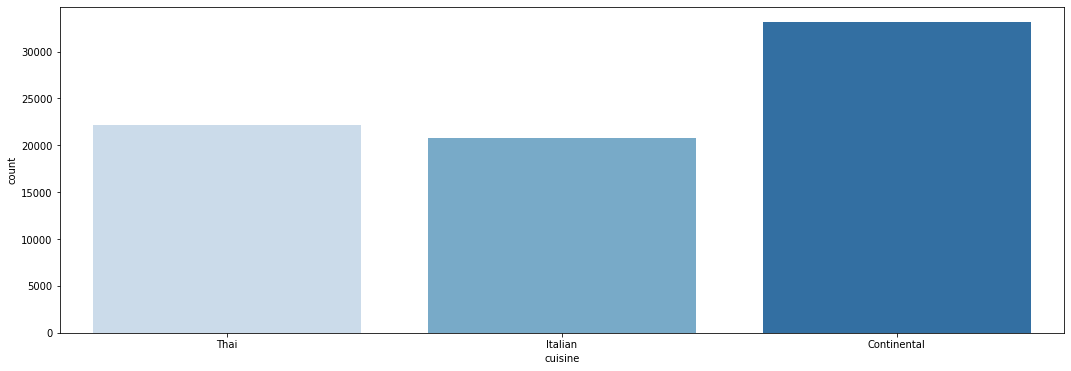

In [53]:
sns.countplot(x = 'cuisine',data=high_promo, palette=palette_b)

<AxesSubplot:xlabel='cuisine', ylabel='count'>

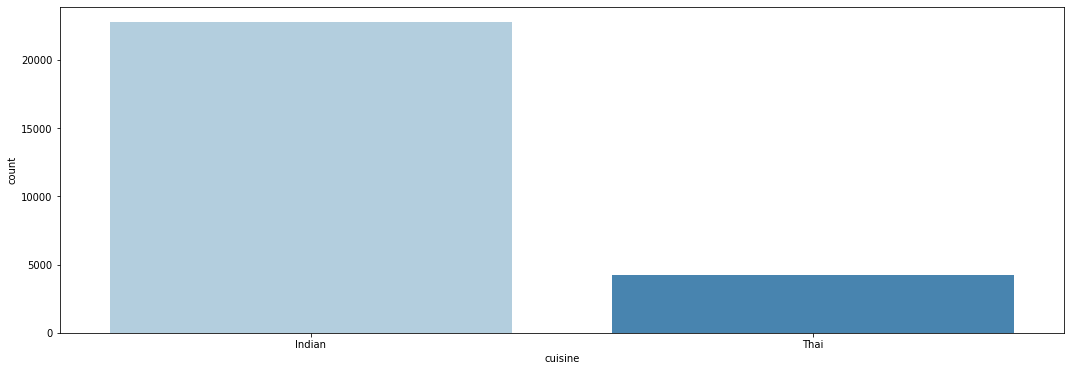

In [54]:
sns.countplot(x = 'cuisine',data=no_promo, palette=palette_b)

##### Meal_ids' 1993,1885,1558,2581,1962,1971 & 2126 were highy promoted by email and highly featured homepage with average discount of 6% with number of orders at 24% of total orders. These meals belonged to Thai, Italian and continental cuisine.

##### Meal_ids' 1198,1247,1770,1920 & 2139  weren't promoted by email at all and had the least promotion in homepage with                                           average discount of 5% with number of orders at 1.5% of total orders. Most of the meals were of Indian cuisine and some of thai.


In [55]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_discount,quarter,avg_homepage_featured_x,avg_homepage_featured_y,avg_email_promo
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,Q1,0.062069,0.062069,0.013793
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,10.808326,Q1,0.062069,0.062069,0.013793
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,0.746714,Q1,0.062069,0.062069,0.013793
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-0.741510,Q1,0.062069,0.062069,0.013793
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,0.677966,Q1,0.062069,0.062069,0.013793


In [56]:
df.shape

(456548, 20)

In [57]:
df['quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

In [58]:
# Distribution of numerical data.

norm_df = df.select_dtypes(include='number')
norm_df.skew().sort_values()

city_code                 -0.209131
meal_id                   -0.172884
week                      -0.049517
id                        -0.001102
region_code                0.056254
center_id                  0.345130
base_price                 0.637661
op_area                    0.664414
checkout_price             0.672330
avg_email_promo            1.350950
total_discount             1.997170
avg_homepage_featured_x    2.383456
avg_homepage_featured_y    2.383456
homepage_featured          2.506022
emailer_for_promotion      3.067713
num_orders                 6.929966
dtype: float64

Text(0.5, 1.0, 'Base price of cuisines')

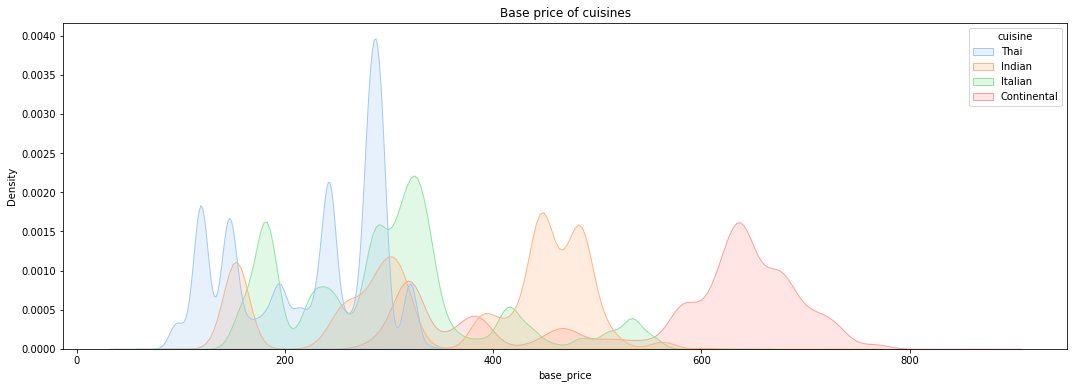

In [59]:
# ax = plt.axes()
# ax.set_facecolor('black')
sns.kdeplot(x=df['base_price'],hue=df['cuisine'],fill=True, palette=palette_light)
plt.title('Base price of cuisines')

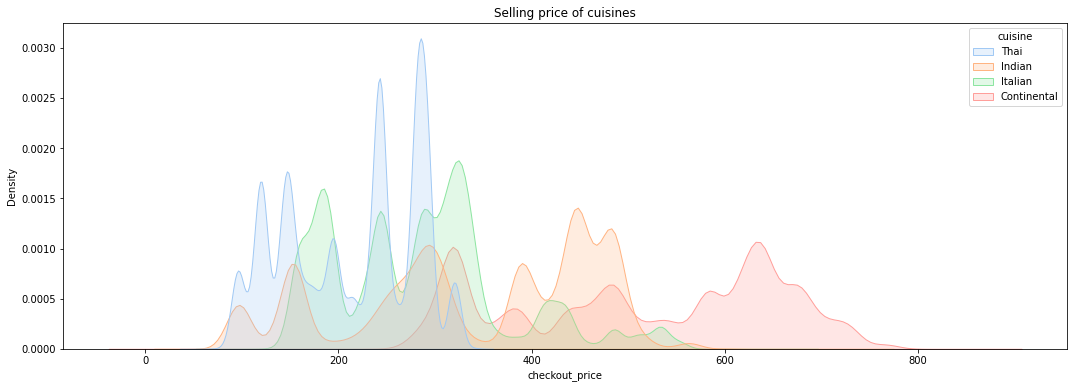

In [60]:
# ax = plt.axes()
# ax.set_facecolor('white')
sns.kdeplot(x=df['checkout_price'],hue=df['cuisine'],fill=True, palette=palette_light)
plt.title('Selling price of cuisines');


#### Continental cuisine seems to the most expensive, whereas Thai cuisine sells at cheapest rate.
#### This might explain the number of outliers in Thai and Indian cuisine and opposite in case Continental cuisine.

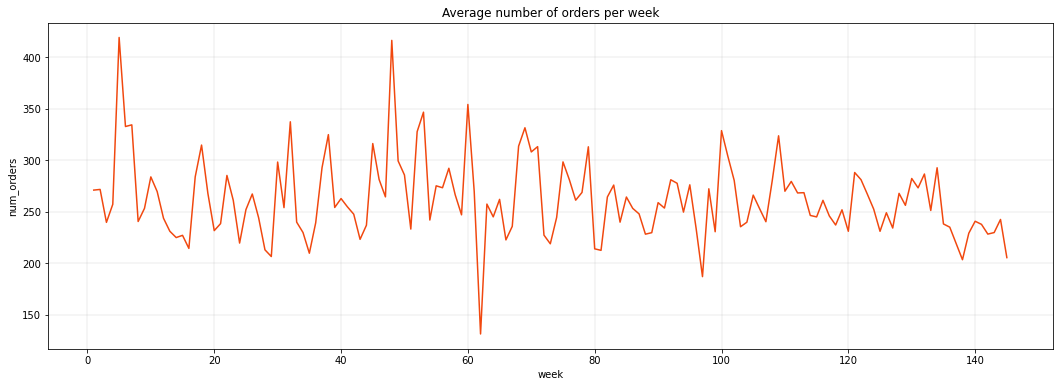

In [61]:
sns.lineplot(data=((df.groupby('week').mean()['num_orders'])),color='#F1480F') 
plt.grid(linewidth = 0.25)
plt.title('Average number of orders per week');

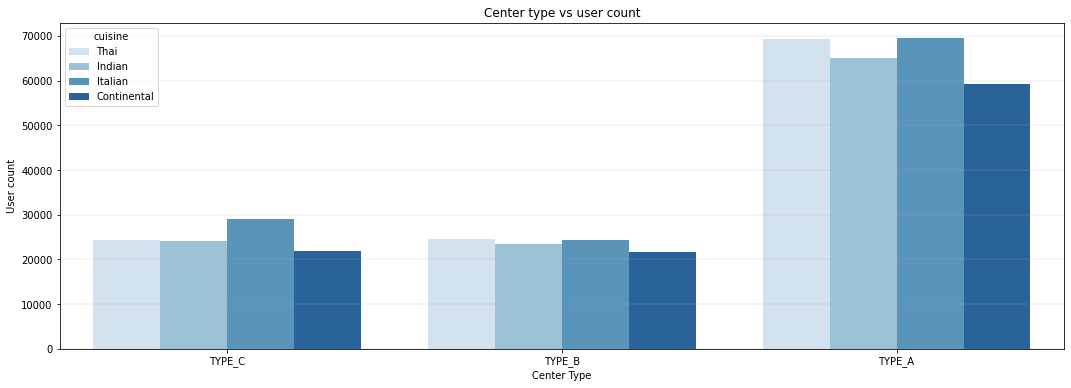

In [62]:
sns.countplot(x = df['center_type'],hue=df['cuisine'],palette=palette_b)
plt.grid(axis= 'y', linewidth = 0.25)
plt.title('Center type vs user count');
plt.ylabel('User count');
plt.xlabel('Center Type');

##### Center type A has the most users

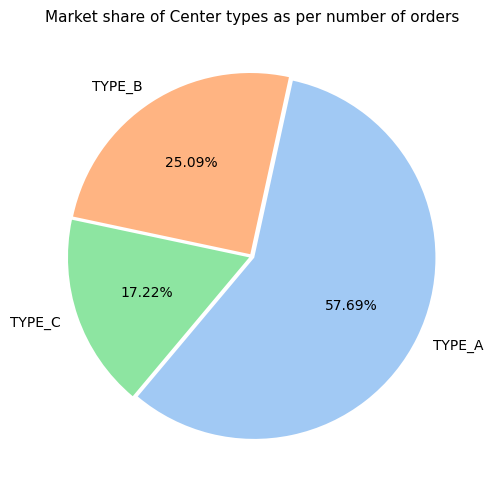

In [63]:
center_ay = df.groupby('center_type')['num_orders'].sum().reset_index()

# Calculating percent share
def cent_per(y):
    return np.round(((y)/center_ay['num_orders'].sum())*100,2)

center_ay['percentage'] = center_ay['num_orders'].apply(cent_per)

plt.figure(figsize=(6,6),dpi=100)
plt.pie(x=center_ay['percentage'], labels=center_ay['center_type'],
        autopct='%1.2f%%',
        startangle=230,
        explode = [0.015,0.015,0.015],
        colors=colors_B)
plt.title('Market share of Center types as per number of orders',fontdict={'fontsize':11})
plt.show()

##### As expected Center type A has the most no of orders

In [64]:
center_info = df.groupby(['center_type']).center_id.unique().reset_index()
print('No of centers under Type A:',len(center_info['center_id'][0]))
print('No of centers under Type B:',len(center_info['center_id'][1]))
print('No of centers under Type B:',len(center_info['center_id'][2]))

No of centers under Type A: 43
No of centers under Type B: 15
No of centers under Type B: 19


In [65]:
print('Centers under Type A:',center_info['center_id'][0])
print('Centers under Type B:',center_info['center_id'][1])
print('Centers under Type C:',center_info['center_id'][2])

Centers under Type A: [ 11  83  32 109  93 186 149  89  97  74  99  66  20 137 126 177  27 157
 106  64 129  17 153  81  73  50 104 145  53 174  77  30  76  59  88  43
  65 102 110 132  23  51  61]
Centers under Type B: [ 24  13  52 146 152 108  34  36  75 161  42  67 143  10  68]
Centers under Type C: [ 55  57 124  94  91  92 162  14 139  26 113  72  29  41  58 101  80  39
  86]


In [66]:
ctr = data=df.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index()

In [67]:
np.round((ctr['num_orders'][:20].sum()/df['num_orders'].sum())*100)

43.0

In [68]:
print((ctr[:20][ctr['center_type']=='TYPE_B']['num_orders'].sum()/ctr['num_orders'][:20].sum())*100)
print((ctr[:20][ctr['center_type']=='TYPE_A']['num_orders'].sum()/ctr['num_orders'][:20].sum())*100)

42.474791772565816
57.52520822743419


In [69]:
ctr[:20]

,center_id,center_type,num_orders
0,13,TYPE_B,4296545
1,43,TYPE_A,3920294
2,10,TYPE_B,3381018
3,52,TYPE_B,3125835
4,137,TYPE_A,3117478
5,67,TYPE_B,2839493
6,11,TYPE_A,2797300
7,174,TYPE_A,2792587
8,104,TYPE_A,2427542
9,27,TYPE_A,2297698


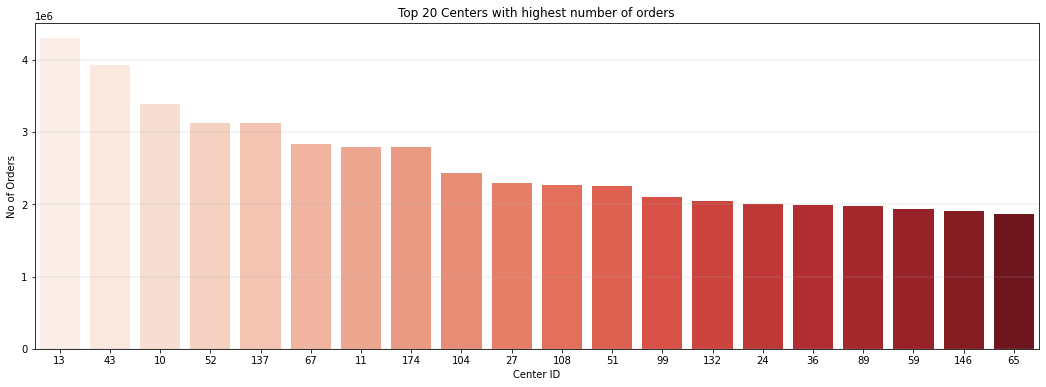

In [70]:
sns.barplot(y='num_orders', x='center_id',
            data=ctr.head(20),
            palette=palette_r,
            order=list(ctr.head(20)['center_id']));
plt.grid(axis= 'y', linewidth = 0.25)
plt.title('Top 20 Centers with highest number of orders')
plt.ylabel('No of Orders')
plt.xlabel('Center ID');

#### Center Type A overall the most orders as it has total 43 centers.
#### But center 13 with most number of orders is Type B, also from top 5 order generating centers 3 are of Type B.
#### As Type B has less centers under it the cumulative order is low.
#### Further top 20 centers constitute of 43% of total number of orders, of this 43% are from Type B and 57% are from Type A. 

## Correlation between the features and target variable

In [71]:
df.corr()['num_orders'].sort_values(ascending=False)

num_orders                 1.000000
homepage_featured          0.294490
emailer_for_promotion      0.277147
total_discount             0.205188
op_area                    0.176976
avg_homepage_featured_x    0.159657
avg_homepage_featured_y    0.159657
city_code                  0.041596
region_code                0.029744
meal_id                    0.010597
avg_email_promo            0.007549
id                         0.000702
week                      -0.017210
center_id                 -0.053035
base_price                -0.222306
checkout_price            -0.282108
Name: num_orders, dtype: float64

<AxesSubplot:>

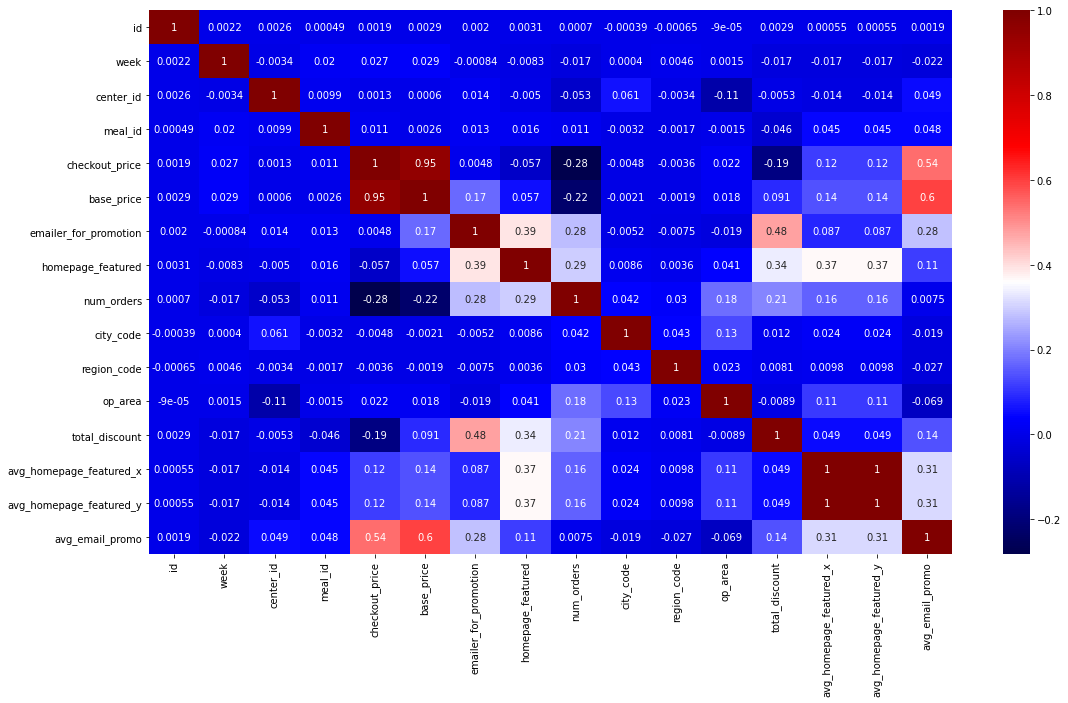

In [72]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap=palette_dark)

##### There seems to be some correlation between base price and avrage email promotion column

<AxesSubplot:xlabel='base_price', ylabel='avg_email_promo'>

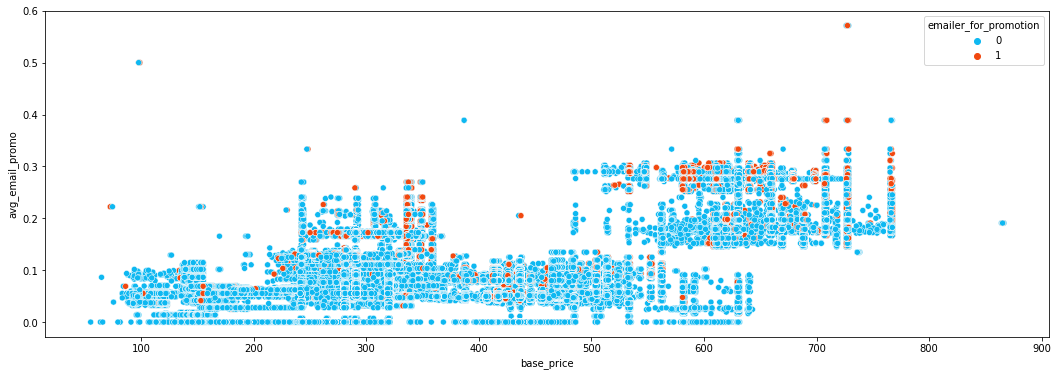

In [73]:
sns.scatterplot(x='base_price', y='avg_email_promo', data=df,
                hue='emailer_for_promotion', palette= palette)

#### Meals with higher base price seem to be most likely promoted through email.

## What are the meals preferances ?

<a id='Q2'></a>

In [74]:
# Top meals according to sum of number of orders.

top_meal_cat = df.groupby('category', as_index=False)['num_orders'].sum()
top_meal_cat.sort_values('num_orders', ascending=False, inplace=True)


# Top meals according to number of orders.

top_meal_cou = df.groupby('category', as_index=False)['id'].count()
top_meal_cou.sort_values('id', ascending=False, inplace=True)
top_meal_cou.rename(columns={'id':'id_count'}, inplace=True)


# Combining both the derived datasets.

top_meals = pd.merge(top_meal_cat,top_meal_cou,on='category')

In [75]:
def meal_per(frequency):
    return np.round((frequency/df['num_orders'].sum()) * 100,2)

top_meals['percentage'] = np.vectorize(meal_per)(top_meals['num_orders'])
top_meals

,category,num_orders,id_count,percentage
0,Beverages,40480525,127890,33.86
1,Rice Bowl,20874063,33408,17.46
2,Sandwich,17636782,33291,14.75
3,Salad,10944336,28559,9.15
4,Pizza,7383720,33138,6.18
5,Other Snacks,4766293,29379,3.99
6,Starters,4649122,29941,3.89
7,Extras,3984979,13562,3.33
8,Seafood,2715714,26916,2.27
9,Desert,1940754,29294,1.62


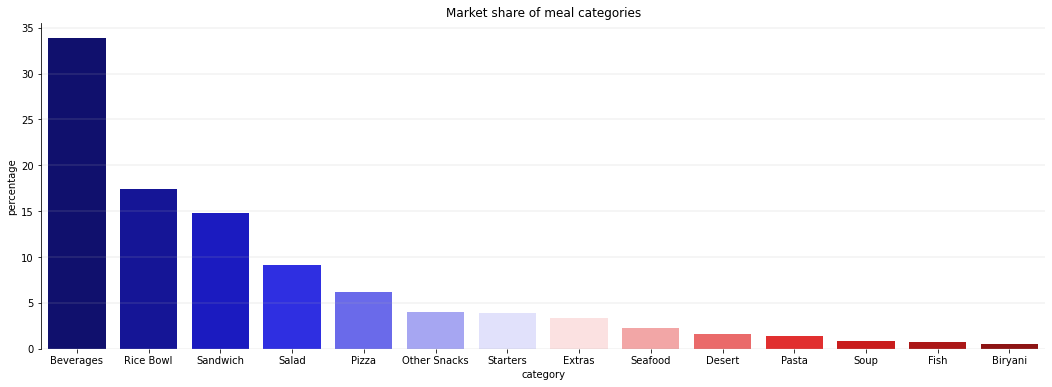

In [76]:
sns.barplot(x='category', y= 'percentage', data=top_meals, palette=palette_dark)
plt.title('Market share of meal categories');
plt.grid(axis= 'y', linewidth = 0.25)
sns.despine(bottom = True);

### Beverages seems to be the most popular meal category type.

In [77]:
top_meals['percentage'][:4].sum()

75.22

In [78]:
print(np.round((top_meals['id_count'][0]/len(df)) * 100,2))
print(np.round(np.round((top_meals['id_count'][:4].sum()/len(df)) * 100,2)))

28.01
49.0


#### Beverages are ordered by 28.01% of all the orders.

#### Beverages, Rice bowl, sandwiches and pizza constitute 49% of all the orders.

#### 75% of the orders are generated by 49% of the total user accounts.

#### We can observe that in some cases such as Pizza, staters, extras, seafood less people are ordering the food but the quantity is bigger.

#### Conversely in case of meals like Biryani and desert, more people are placing the order with less quantity.

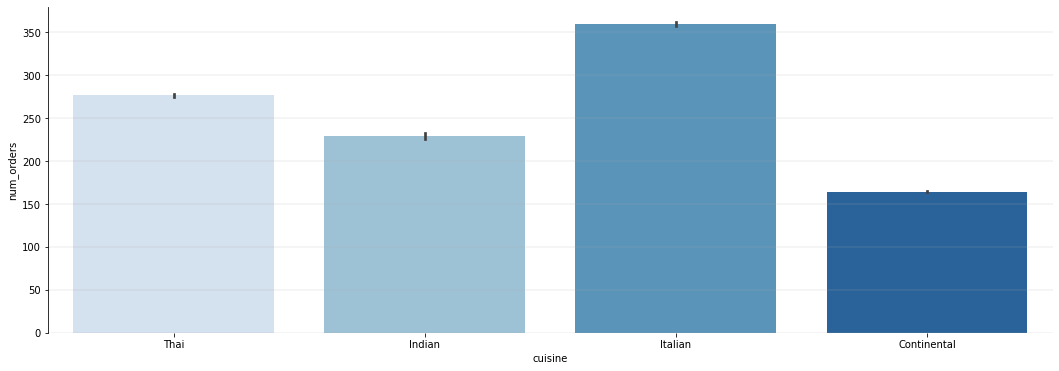

In [79]:
sns.barplot(x = df['cuisine'], y=df['num_orders'],palette= palette_b)
plt.grid(axis= 'y', linewidth = 0.25)
sns.despine(bottom = True);

### Effect of seasonal meals

In [80]:
print('Total no of meals available:',train_df['meal_id'].nunique())
print(train_df['id'].nunique())

Total no of meals available: 51
456548


In [81]:
category_Q = df.pivot_table(values='num_orders',index='category',columns='quarter')
category_Q

quarter,Q1,Q2,Q3,Q4
category,,,,
Beverages,355.384127,312.155169,296.587351,302.839523
Biryani,32.756962,29.334136,29.565304,30.780371
Desert,60.959515,64.757276,67.515623,71.543161
Extras,313.875899,283.820368,293.285629,284.886760
Fish,88.024423,69.353191,95.640983,88.304183
Other Snacks,170.127376,164.260412,160.341092,154.052711
Pasta,63.515687,57.072698,58.176080,57.842135
Pizza,165.360976,231.724558,196.461417,294.978631
Rice Bowl,752.914062,544.755405,579.494517,622.225278


In [82]:
category_Cui = df.pivot_table(values='num_orders',index='category',columns='cuisine',aggfunc='mean',fill_value=0)
category_Cui

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,182.559624,80.075061,418.021329,558.425855
Biryani,0.000000,30.651402,0.000000,0.000000
Desert,0.000000,66.250905,0.000000,0.000000
Extras,0.000000,0.000000,0.000000,293.834169
Fish,85.595268,0.000000,0.000000,0.000000
Other Snacks,0.000000,0.000000,0.000000,162.234691
Pasta,0.000000,0.000000,59.137142,0.000000
Pizza,222.817309,0.000000,0.000000,0.000000
Rice Bowl,0.000000,624.822288,0.000000,0.000000


In [83]:
df[df['category']=='Rice Bowl']['cuisine'].unique()

array(['Indian'], dtype=object)

In [84]:
cuisine_Q = df.pivot_table(values='num_orders',index='quarter',columns='cuisine')
cuisine_Q

cuisine,Continental,Indian,Italian,Thai
quarter,,,,
Q1,185.071321,263.735166,330.112903,314.449856
Q2,158.026682,206.288860,381.636675,266.758309
Q3,145.265168,215.183927,388.610044,256.119962
Q4,170.536982,230.535377,336.768245,268.387149


<AxesSubplot:xlabel='cuisine', ylabel='quarter'>

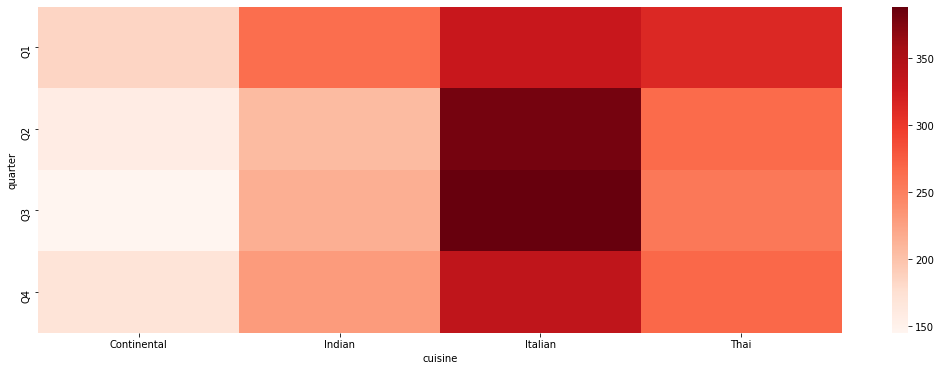

In [85]:
sns.heatmap(cuisine_Q, cmap=palette_r)

#### Continental and Indian cuisine seems to be preferred in Q1 & Q4 more.
#### Italian cuisine is clearly preferred in Q2 & Q3.
#### Thai is prominent througout with slight preferrence to Q1.

In [86]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_discount,quarter,avg_homepage_featured_x,avg_homepage_featured_y,avg_email_promo
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,Q1,0.062069,0.062069,0.013793
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,10.808326,Q1,0.062069,0.062069,0.013793
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,0.746714,Q1,0.062069,0.062069,0.013793
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-0.741510,Q1,0.062069,0.062069,0.013793
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,0.677966,Q1,0.062069,0.062069,0.013793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental,7.533345,Q4,0.132530,0.132530,0.000000
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental,0.171812,Q4,0.132530,0.132530,0.000000
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental,-0.344216,Q4,0.132530,0.132530,0.000000
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental,-0.172108,Q4,0.132530,0.132530,0.000000


### What are the major buisness generating cities? And percentage of buisness do they consist of?

<a id='Q3'></a>

In [87]:
df['city_code'].nunique()

51

In [88]:
df['center_id'].nunique()

77

In [89]:
sales_per_city = df.groupby(['city_code'])['num_orders'].sum().sort_values(ascending=False)
major_buisness_city = pd.DataFrame(sales_per_city)
major_buisness_city.reset_index(inplace=True)

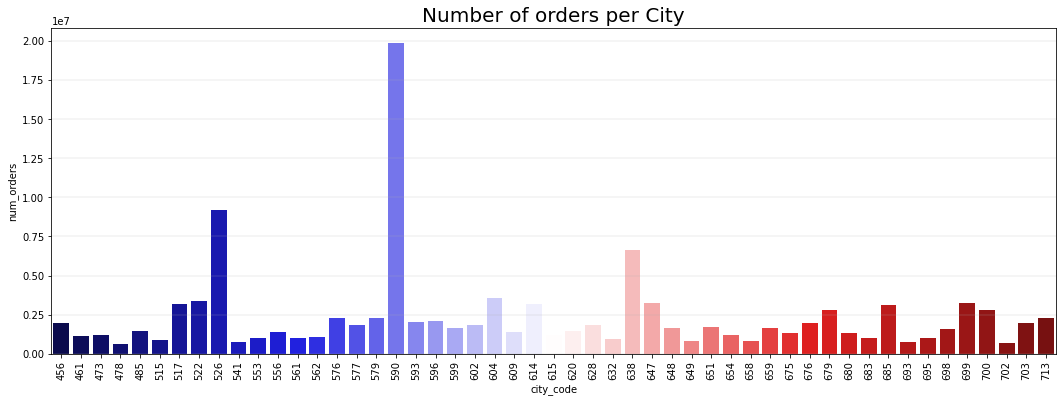

In [90]:
sns.barplot(x='city_code',y= 'num_orders',data= major_buisness_city, palette=palette_dark )
plt.xticks(rotation = 90)
plt.grid(axis= 'y', linewidth = 0.25)
plt.title("Number of orders per City",fontsize=20);

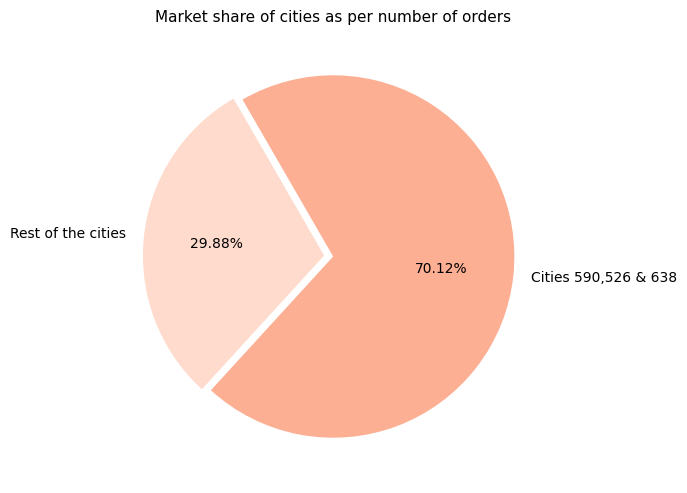

In [91]:
ords_big3 = np.round(((sales_per_city.sum() - sales_per_city[0:3].sum())/sales_per_city.sum()) * 100,2)
rest_cts = 100 - ords_big3

cpm_ords = pd.DataFrame({'Columns':['Rest of the cities','Cities 590,526 & 638'],
                'Data':[rest_cts,ords_big3]})

plt.figure(figsize=(6,6),dpi=100)
plt.pie(x=cpm_ords['Data'], labels=cpm_ords['Columns'],
        autopct='%1.2f%%',
        startangle=120,
        explode = [0.05,0],
        colors=colors_R)
plt.title('Market share of cities as per number of orders',fontdict={'fontsize':11})
plt.show()

#### 70% of the entire sales from the begning were from 3 cities (590, 526 and 638)

### Analysing cities 590,526,638

In [92]:
# Analysing cities 590,526,638

city_ayn = df[df['city_code'].isin([590,526,638])]
center_ords = city_ayn.groupby('center_type')['num_orders'].sum().reset_index()

# Calculating percent share
def center_per(x):
    return np.round(((x)/center_ords['num_orders'].sum())*100,2)

center_ords['percentage'] = center_ords['num_orders'].apply(center_per)
center_ords

,center_type,num_orders,percentage
0,TYPE_A,15377129,43.05
1,TYPE_B,12423591,34.78
2,TYPE_C,7918745,22.17


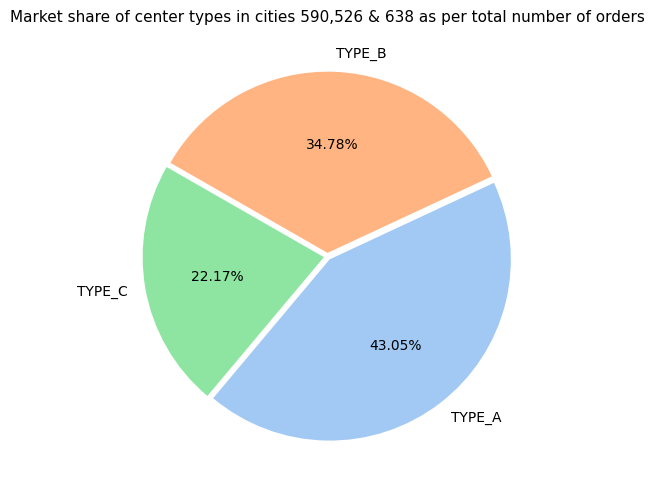

In [93]:
plt.figure(figsize=(6,6),dpi=100)
plt.pie(x=center_ords['percentage'], labels=center_ords['center_type'],
        autopct='%1.2f%%',
        startangle=230,
        explode=[0.02,0.02,0.02],
        colors=colors_B)
plt.title('Market share of center types in cities 590,526 & 638 as per total number of orders',
          fontdict={'fontsize':11})
plt.show()

In [94]:
def meal_per(frequency):
    return np.round((frequency/tp_mls['num_orders'].sum()) * 100,2)

tp_mls = city_ayn.groupby('category').sum()['num_orders'].reset_index()


tp_mls['percentage'] = np.vectorize(meal_per)(tp_mls['num_orders'])
tp_mls.sort_values('percentage',ascending=False,inplace=True)


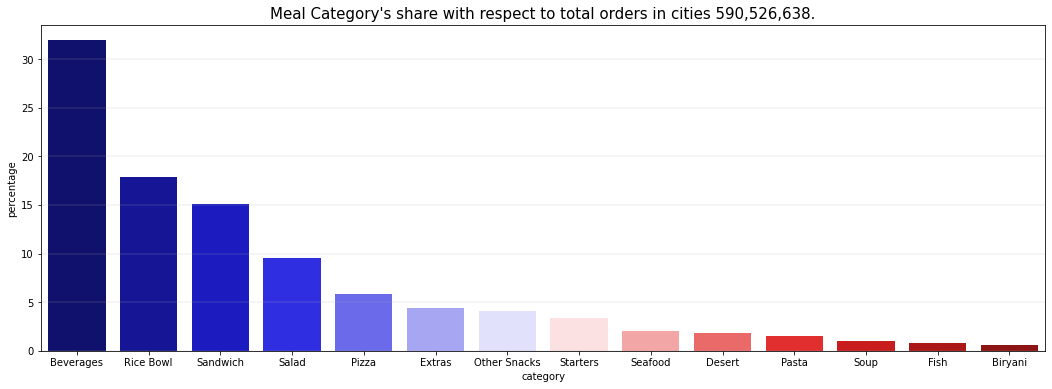

In [95]:
sns.barplot(y=tp_mls['percentage'], x=tp_mls['category'], palette= palette_dark)
plt.title("Meal Category's share with respect to total orders in cities 590,526,638.",fontdict={'fontsize':15})
plt.grid(axis= 'y', linewidth = 0.25)
plt.show()

### Sales (number of orders) trough years

<a id='Q4'></a>

####  Sales in 1st year

In [96]:
year_1 = df[df['week'] <49]
num_odr_1 = year_1.groupby(['city_code'])['num_orders'].sum().sort_values(ascending=False)
sales_1_yr = num_odr_1.sum()
print(f'sales in 1st year :{sales_1_yr}')

sales in 1st year :37960979


In [97]:
per_sale_1 = np.round(((num_odr_1.sum() - num_odr_1[0:3].sum())/num_odr_1.sum()) * 100,2)
print(f'sales in top 3 cities in 1st year :{per_sale_1}%')

sales in top 3 cities in 1st year :70.26%


#### Sales in 2nd year

In [98]:
year_2 = df[(df['week'] > 48) & (df['week'] < 97)]
num_odr_2 = year_2.groupby(['city_code'])['num_orders'].sum().sort_values(ascending=False)
sales_2_yr = num_odr_2.sum()
print(f'sales in 1st year :{sales_2_yr}')

sales in 1st year :40766672


In [99]:
per_sale_2 = np.round(((num_odr_2.sum() - num_odr_2[0:3].sum())/num_odr_2.sum()) * 100,2)
print(f'sales in top 3 cities in 1st year :{per_sale_2}%')

sales in top 3 cities in 1st year :70.32%


#### Sales in 3rd year

In [100]:
year_3 = df[df['week'] > 96]
num_odr_3 = year_3.groupby(['city_code'])['num_orders'].sum().sort_values(ascending=False)
sales_3_yr = num_odr_3.sum()
print(f'sales in 1st year :{sales_3_yr}')

sales in 1st year :40829834


In [101]:
per_sale_3 = np.round(((num_odr_3.sum() - num_odr_3[0:3].sum())/num_odr_3.sum()) * 100,2)
print(f'sales in top 3 cities in 1st year :{per_sale_3}%')

sales in top 3 cities in 1st year :69.8%


### What is the growth rate year on year?

In [102]:
print(f'Growth of sales in 2nd year :{np.round(((sales_2_yr - sales_1_yr)/sales_2_yr) * 100,2)}%')

Growth of sales in 2nd year :6.88%


In [103]:
print(f'Growth of sales in 3rd year :{np.round(((sales_3_yr - sales_2_yr)/sales_3_yr) * 100,2)}%')

Growth of sales in 3rd year :0.15%


### How much is the influence of Marketing and discount?

<a id='Q5'></a>

In [104]:
df['total_discount'].describe()

count    456548.000000
mean          5.719500
std          11.362753
min         -72.789753
25%          -0.145406
50%           0.141217
75%           6.242147
max          99.060870
Name: total_discount, dtype: float64

In [105]:
df[['total_discount','num_orders']].corr()

,total_discount,num_orders
total_discount,1.000000,0.205188
num_orders,0.205188,1.000000


In [106]:
df.corr()['total_discount']

id                         0.002910
week                      -0.017437
center_id                 -0.005302
meal_id                   -0.045715
checkout_price            -0.185213
base_price                 0.090994
emailer_for_promotion      0.477564
homepage_featured          0.338011
num_orders                 0.205188
city_code                  0.011755
region_code                0.008082
op_area                   -0.008919
total_discount             1.000000
avg_homepage_featured_x    0.048767
avg_homepage_featured_y    0.048767
avg_email_promo            0.138886
Name: total_discount, dtype: float64

In [107]:
palette

['#0EB8F1', '#F1480F']

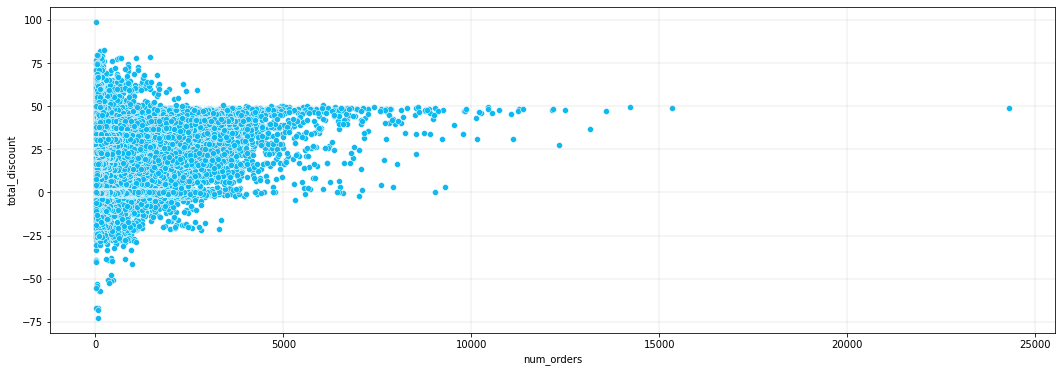

In [108]:
sns.scatterplot(x=df['num_orders'], y=df['total_discount'], color='#0EB8F1') 
plt.grid(linewidth = 0.25)

#### We can deduce from the above figure that discount between 25% and 50% yields in high number of orders, with highest number of orders where with 50% discount.

In [109]:
discount_25 = df[(df['total_discount'] >= 0) & (df['total_discount'] <= 25)]
discount_50 = df[(df['total_discount'] > 25)]
hiked_price = df[df['total_discount'] < 0 ]

In [110]:
(len(discount_25)/len(df))* 100

65.89208582668196

In [111]:
(len(discount_50)/len(df))* 100

8.677729395375733

In [112]:
(len(hiked_price)/len(df))* 100

25.4301847779423

##### 65% of all the orders were discounted between 1 - 25 %, while 9% of the orders were discounted higher than 25%.
##### 25% of all the orders were hiked in price.

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='count'>

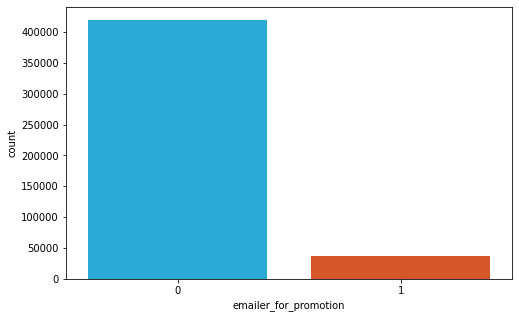

In [113]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['emailer_for_promotion'],palette= palette)

<AxesSubplot:xlabel='total_discount', ylabel='num_orders'>

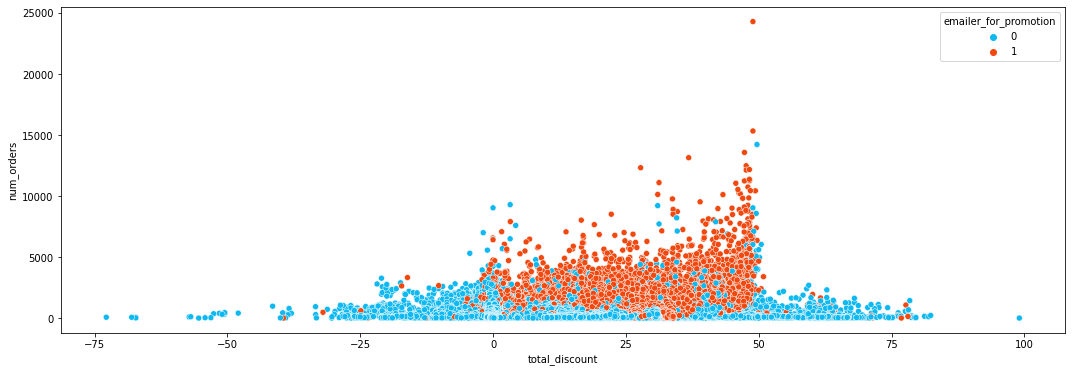

In [114]:
sns.scatterplot(x=df['total_discount'], y=df['num_orders'],hue=df['emailer_for_promotion'],palette= palette)

In [115]:
email_dis = df[df['emailer_for_promotion']==1]
(len(email_dis[email_dis['total_discount']>25])/len(email_dis) *100)

47.03373819163293

In [116]:
(len(email_dis)/len(df)) * 100

8.115247465764828

In [117]:
(len(email_dis[email_dis['total_discount']>1])/len(email_dis) *100)

95.65721997300945

In [118]:
email_dis['total_discount'].max()

78.0873376115198

#### 8% of meals ordered were promoted by email.

#### 47% of all the meals promoted by email had a discount of atleast 25%, while 92% meals had a discount of atleast 5%.

#### 95% of the meals sold from email promotion have some discount in range of (1% to 78%).

<AxesSubplot:xlabel='homepage_featured', ylabel='count'>

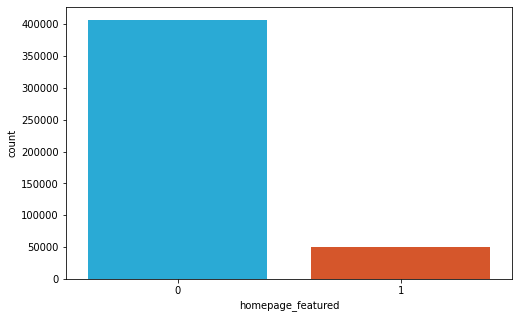

In [119]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['homepage_featured'],palette= palette)

<AxesSubplot:xlabel='total_discount', ylabel='num_orders'>

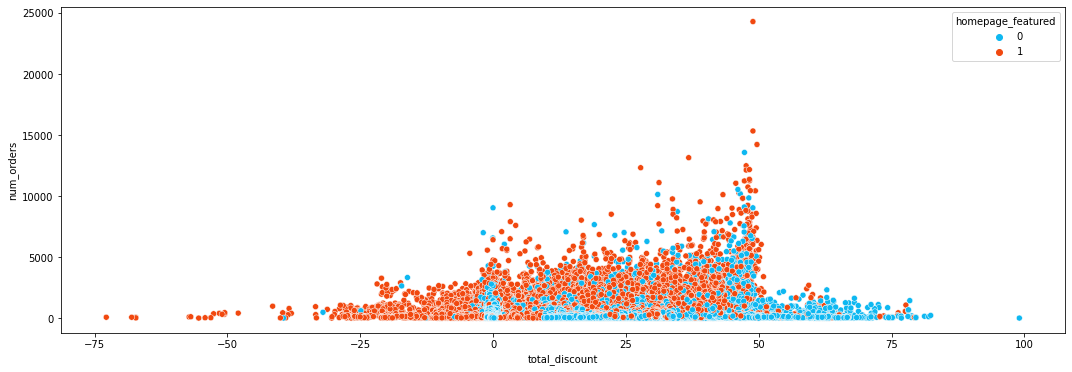

In [120]:
sns.scatterplot(x=df['total_discount'], y=df['num_orders'],hue=df['homepage_featured'],palette= palette)

In [121]:
homepage_dis = df[df['homepage_featured']==1]
(len(homepage_dis)/len(df))*100

10.919990888143197

In [122]:
(len(homepage_dis[homepage_dis['total_discount']>1])/len(homepage_dis))*100

74.41781165379601

In [123]:
(len(homepage_dis[homepage_dis['total_discount']<0])/len(homepage_dis))*100

14.457927991174405

In [124]:
homepage_dis['total_discount'].mean()

16.689164102344964

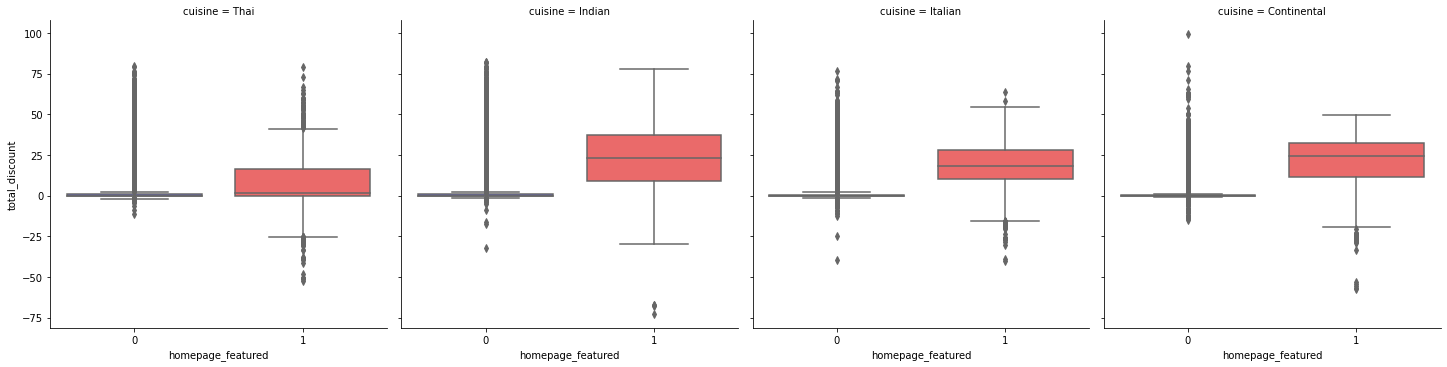

In [125]:
sns.catplot(x='homepage_featured', y='total_discount',data=df,kind='box', col='cuisine',palette=palette_dark)

#### 11% of the meals ordered were promoted on the homepage with average discount of 17%
#### While 75% of homepage featured meals were discounted and rest 15% were sold with hiked prices.